In [1]:
import pandas as pd
import json
import numpy as np
import pickle
from ast import literal_eval
import sys
import time

sys.path.append('../datawrangling')

# import modules
import dataloader_paths
from Gretel_path_prediction import GretelPathPrediction

import warnings
warnings.filterwarnings('ignore')

In [2]:
load_model = False
directory = '../../models/gretel_prediction_models/oslo_passenger/'
path_format = 'node2node'

# Either load model from file...
if load_model:
    # load model from file
    network_name = '202204_waypoints_DP30_HDBSCAN25_stavanger_full_UTM'
    model_path = '../../models/gretel_prediction_models/trained_models/'+network_name+'_target.obj'
    fileObj = open(model_path, 'rb')
    model = pickle.load(fileObj)
    fileObj.close()
    with open('../../models/gretel_prediction_models/trained_models/metadata_stavanger.json', 'r') as json_file:
        meta_dict = json.load(json_file) 
    data_version = meta_dict['data_version']
    print(meta_dict)
    
# ... or train model from scratch
else:
    config_file = 'route_target'
    task = 'path'
    # load metadata file
    with open(directory+path_format+'/metadata.json', 'r') as json_file:
        meta_dict = json.load(json_file)
    network_name = meta_dict['network_name']
    data_version = meta_dict['data_version']
    filter = meta_dict['filter']
    # train model
    model = GretelPathPrediction()
    model.train(config_file, directory, task)

number of trajectories:  2766
number of valid trajectories (length in [2, 85]): 2766
trajectories length: min 2 | max 83 | mean 16.57
split train/(valid)?/test 0.8/0.2
==== START "oslo_passenger" ====
Checkpoints will be saved in [../../models/gretel_prediction_models/oslo_passenger/chkpt/oslo_passenger]
Number of node features 6. Number of edge features 3
No initial edge transformer.
Computing non backtracking edges...
Done
=== BASELINE ===
TEST DATASET


100%|████████████████████████████████████████| 553/553 [00:03<00:00, 166.06it/s]


| Metric               |    Value |
|----------------------|----------|
| target_probability   | 0.260877 |
| choice_accuracy      | 0.264014 |
| choice_accuracy_deg3 | 0.264014 |
| precision_top1       | 0.208861 |
| precision_top5       | 0.762297 |
| path_nll             | 1.65913  |
| path_nll_deg3        | 1.65913  |
TRAIN DATASET


100%|██████████████████████████████████████| 2212/2212 [00:09<00:00, 223.22it/s]


| Metric               |    Value |
|----------------------|----------|
| target_probability   | 0.201815 |
| choice_accuracy      | 0.2066   |
| choice_accuracy_deg3 | 0.2066   |
| precision_top1       | 0.163082 |
| precision_top5       | 0.681538 |
| path_nll             | 1.90748  |
| path_nll_deg3        | 1.90748  |
=== NON BACKTRACKING BASELINE ===
TEST DATASET


100%|█████████████████████████████████████████| 553/553 [00:12<00:00, 43.68it/s]


| Metric               |    Value |
|----------------------|----------|
| target_probability   | 0.260877 |
| choice_accuracy      | 0.261302 |
| choice_accuracy_deg3 | 0.261302 |
| precision_top1       | 0.208861 |
| precision_top5       | 0.762297 |
| path_nll             | 1.65913  |
| path_nll_deg3        | 1.65913  |
TRAIN DATASET


100%|███████████████████████████████████████| 2212/2212 [00:38<00:00, 57.42it/s]

| Metric               |    Value |
|----------------------|----------|
| target_probability   | 0.201815 |
| choice_accuracy      | 0.203375 |
| choice_accuracy_deg3 | 0.203375 |
| precision_top1       | 0.163082 |
| precision_top5       | 0.681538 |
| path_nll             | 1.90748  |
| path_nll_deg3        | 1.90748  |
Computing non backtracking graph... 

Done

=== TEST ===



100%|█████████████████████████████████████████| 553/553 [00:20<00:00, 26.80it/s]


| Metric               |    Value |
|----------------------|----------|
| target_probability   | 0.247654 |
| choice_accuracy      | 0.185533 |
| choice_accuracy_deg3 | 0.185533 |
| precision_top1       | 0.187703 |
| precision_top5       | 0.649277 |
| path_nll             | 1.74858  |
| path_nll_deg3        | 1.74858  |

=== EPOCH 0 ===
Progress 10% | iter 43 | 689.7 pred/s | loss target_only -5.606509288824019e-05
Progress 20% | iter 87 | 654.8 pred/s | loss target_only -5.9603287716569806e-05
Progress 30% | iter 131 | 670.0 pred/s | loss target_only -7.525395450933677e-05
Progress 40% | iter 175 | 692.0 pred/s | loss target_only -7.890968014004464e-05
Progress 50% | iter 219 | 699.9 pred/s | loss target_only -7.545454459330653e-05
Progress 60% | iter 263 | 639.5 pred/s | loss target_only -8.825311803337605e-05
Progress 70% | iter 307 | 675.6 pred/s | loss target_only -8.82731155257757e-05
Progress 80% | iter 351 | 657.3 pred/s | loss target_only -9.738902192252319e-05
Progress 90% 

100%|█████████████████████████████████████████| 553/553 [00:21<00:00, 25.26it/s]


| Metric               |    Value |
|----------------------|----------|
| target_probability   | 0.391234 |
| choice_accuracy      | 0.515732 |
| choice_accuracy_deg3 | 0.515732 |
| precision_top1       | 0.51094  |
| precision_top5       | 0.90642  |
| path_nll             | 1.34442  |
| path_nll_deg3        | 1.34442  |
Checkpointing...
Checkpoint saved in ../../models/gretel_prediction_models/oslo_passenger/chkpt/oslo_passenger/0000.pt

=== EPOCH 1 ===
Progress 10% | iter 43 | 681.8 pred/s | loss target_only -0.00010499603549526918
Progress 20% | iter 87 | 600.8 pred/s | loss target_only -0.0001105169459001086
Progress 30% | iter 131 | 599.8 pred/s | loss target_only -0.00011853310171573707
Progress 40% | iter 175 | 647.0 pred/s | loss target_only -0.000104511764876664
Progress 50% | iter 219 | 629.6 pred/s | loss target_only -0.00012038419318927596
Progress 60% | iter 263 | 660.0 pred/s | loss target_only -0.0001281214553368195
Progress 70% | iter 307 | 671.8 pred/s | loss target_o

100%|█████████████████████████████████████████| 553/553 [00:21<00:00, 26.21it/s]


| Metric               |    Value |
|----------------------|----------|
| target_probability   | 0.474324 |
| choice_accuracy      | 0.596022 |
| choice_accuracy_deg3 | 0.596022 |
| precision_top1       | 0.595479 |
| precision_top5       | 0.962477 |
| path_nll             | 1.29705  |
| path_nll_deg3        | 1.29705  |

=== EPOCH 2 ===
Progress 10% | iter 43 | 656.4 pred/s | loss target_only -0.00014639318817059668
Progress 20% | iter 87 | 672.2 pred/s | loss target_only -0.0001369412301999081
Progress 30% | iter 131 | 668.1 pred/s | loss target_only -0.00013858199438309288
Progress 40% | iter 175 | 681.2 pred/s | loss target_only -0.00013453625882644938
Progress 50% | iter 219 | 649.5 pred/s | loss target_only -0.00013720669847151095
Progress 60% | iter 263 | 641.0 pred/s | loss target_only -0.00014267819952611357
Progress 70% | iter 307 | 618.2 pred/s | loss target_only -0.00012919904984159367
Progress 80% | iter 351 | 630.7 pred/s | loss target_only -0.0001523817196474293
Progres

100%|█████████████████████████████████████████| 553/553 [00:21<00:00, 26.29it/s]


| Metric               |    Value |
|----------------------|----------|
| target_probability   | 0.541149 |
| choice_accuracy      | 0.633002 |
| choice_accuracy_deg3 | 0.633002 |
| precision_top1       | 0.632098 |
| precision_top5       | 0.968354 |
| path_nll             | 1.20203  |
| path_nll_deg3        | 1.20203  |

=== EPOCH 3 ===
Progress 10% | iter 43 | 647.3 pred/s | loss target_only -0.0001495609998415539
Progress 20% | iter 87 | 673.1 pred/s | loss target_only -0.00014122976782651253
Progress 30% | iter 131 | 678.1 pred/s | loss target_only -0.00014572473631388363
Progress 40% | iter 175 | 620.4 pred/s | loss target_only -0.000158568540725234
Progress 50% | iter 219 | 690.4 pred/s | loss target_only -0.000138963946136473
Progress 60% | iter 263 | 692.8 pred/s | loss target_only -0.00013944563012697228
Progress 70% | iter 307 | 666.1 pred/s | loss target_only -0.00014419793532025215
Progress 80% | iter 351 | 670.1 pred/s | loss target_only -0.00015739589199647373
Progress 9

100%|█████████████████████████████████████████| 553/553 [00:21<00:00, 26.16it/s]


| Metric               |    Value |
|----------------------|----------|
| target_probability   | 0.577591 |
| choice_accuracy      | 0.647559 |
| choice_accuracy_deg3 | 0.647559 |
| precision_top1       | 0.647649 |
| precision_top5       | 0.971519 |
| path_nll             | 1.25384  |
| path_nll_deg3        | 1.25384  |

=== EPOCH 4 ===
Progress 10% | iter 43 | 689.5 pred/s | loss target_only -0.00014078128446595741
Progress 20% | iter 87 | 659.2 pred/s | loss target_only -0.00014798667832824884
Progress 30% | iter 131 | 667.8 pred/s | loss target_only -0.00015006520456160177
Progress 40% | iter 175 | 670.2 pred/s | loss target_only -0.00015162666440416211
Progress 50% | iter 219 | 675.3 pred/s | loss target_only -0.00015064220728162018
Progress 60% | iter 263 | 667.7 pred/s | loss target_only -0.0001528064732427721
Progress 70% | iter 307 | 682.2 pred/s | loss target_only -0.00014781423618143
Progress 80% | iter 351 | 630.1 pred/s | loss target_only -0.00015618736085219582
Progress 

100%|█████████████████████████████████████████| 553/553 [00:21<00:00, 25.92it/s]


| Metric               |    Value |
|----------------------|----------|
| target_probability   | 0.575796 |
| choice_accuracy      | 0.636709 |
| choice_accuracy_deg3 | 0.636709 |
| precision_top1       | 0.638246 |
| precision_top5       | 0.961392 |
| path_nll             | 1.38554  |
| path_nll_deg3        | 1.38554  |

=== EPOCH 5 ===
Progress 10% | iter 43 | 684.8 pred/s | loss target_only -0.0001448151584434595
Progress 20% | iter 87 | 698.1 pred/s | loss target_only -0.0001462187378456216
Progress 30% | iter 131 | 680.6 pred/s | loss target_only -0.0001547451271168458
Progress 40% | iter 175 | 675.6 pred/s | loss target_only -0.0001602462587028004
Progress 50% | iter 219 | 610.8 pred/s | loss target_only -0.00015209930160001172
Progress 60% | iter 263 | 610.7 pred/s | loss target_only -0.00015212753200128688
Progress 70% | iter 307 | 615.7 pred/s | loss target_only -0.0001530524993662691
Progress 80% | iter 351 | 625.8 pred/s | loss target_only -0.00015406136746173136
Progress 9

100%|█████████████████████████████████████████| 553/553 [00:22<00:00, 25.13it/s]


| Metric               |    Value |
|----------------------|----------|
| target_probability   | 0.615815 |
| choice_accuracy      | 0.654792 |
| choice_accuracy_deg3 | 0.654792 |
| precision_top1       | 0.654792 |
| precision_top5       | 0.974231 |
| path_nll             | 1.31025  |
| path_nll_deg3        | 1.31025  |
Checkpointing...
Checkpoint saved in ../../models/gretel_prediction_models/oslo_passenger/chkpt/oslo_passenger/0005.pt

=== EPOCH 6 ===
Progress 10% | iter 43 | 635.1 pred/s | loss target_only -0.00017301984796694024
Progress 20% | iter 87 | 675.6 pred/s | loss target_only -0.00013800018857718435
Progress 30% | iter 131 | 634.6 pred/s | loss target_only -0.0001636587593702883
Progress 40% | iter 175 | 693.8 pred/s | loss target_only -0.00014260511607746328
Progress 50% | iter 219 | 658.9 pred/s | loss target_only -0.00015474415712521487
Progress 60% | iter 263 | 636.4 pred/s | loss target_only -0.00017411496328270955
Progress 70% | iter 307 | 615.0 pred/s | loss targe

100%|█████████████████████████████████████████| 553/553 [00:22<00:00, 25.06it/s]


| Metric               |    Value |
|----------------------|----------|
| target_probability   | 0.61729  |
| choice_accuracy      | 0.661212 |
| choice_accuracy_deg3 | 0.661212 |
| precision_top1       | 0.661212 |
| precision_top5       | 0.971248 |
| path_nll             | 1.39824  |
| path_nll_deg3        | 1.39824  |

=== EPOCH 7 ===
Progress 10% | iter 43 | 629.0 pred/s | loss target_only -0.00015504976892339483
Progress 20% | iter 87 | 652.7 pred/s | loss target_only -0.00014236483071366438
Progress 30% | iter 131 | 624.4 pred/s | loss target_only -0.00016119629019857034
Progress 40% | iter 175 | 648.9 pred/s | loss target_only -0.00016588371118080543
Progress 50% | iter 219 | 616.0 pred/s | loss target_only -0.00018070469210995806
Progress 60% | iter 263 | 682.1 pred/s | loss target_only -0.0001499612560888397
Progress 70% | iter 307 | 662.5 pred/s | loss target_only -0.0001584765837007645
Progress 80% | iter 351 | 679.4 pred/s | loss target_only -0.00015687215282781576
Progres

100%|█████████████████████████████████████████| 553/553 [00:22<00:00, 24.97it/s]


| Metric               |    Value |
|----------------------|----------|
| target_probability   | 0.622651 |
| choice_accuracy      | 0.657595 |
| choice_accuracy_deg3 | 0.657595 |
| precision_top1       | 0.657595 |
| precision_top5       | 0.970344 |
| path_nll             | 1.39543  |
| path_nll_deg3        | 1.39543  |

=== EPOCH 8 ===
Progress 10% | iter 43 | 681.0 pred/s | loss target_only -0.00016033636479061822
Progress 20% | iter 87 | 631.7 pred/s | loss target_only -0.00016026733153754556
Progress 30% | iter 131 | 624.2 pred/s | loss target_only -0.00015828774127937858
Progress 40% | iter 175 | 663.4 pred/s | loss target_only -0.00014611000369262327
Progress 50% | iter 219 | 674.3 pred/s | loss target_only -0.00016822697437388436
Progress 60% | iter 263 | 670.3 pred/s | loss target_only -0.00016493870721775303
Progress 70% | iter 307 | 689.7 pred/s | loss target_only -0.00014774332457074738
Progress 80% | iter 351 | 658.3 pred/s | loss target_only -0.0001680798841900713
Progre

100%|█████████████████████████████████████████| 553/553 [00:21<00:00, 25.38it/s]


| Metric               |    Value |
|----------------------|----------|
| target_probability   | 0.634583 |
| choice_accuracy      | 0.658951 |
| choice_accuracy_deg3 | 0.658951 |
| precision_top1       | 0.658951 |
| precision_top5       | 0.972966 |
| path_nll             | 1.46599  |
| path_nll_deg3        | 1.46599  |

=== EPOCH 9 ===
Progress 10% | iter 43 | 595.6 pred/s | loss target_only -0.0001639086491552809
Progress 20% | iter 87 | 632.4 pred/s | loss target_only -0.00016837872197051097
Progress 30% | iter 131 | 550.7 pred/s | loss target_only -0.00016996026848118277
Progress 40% | iter 175 | 655.3 pred/s | loss target_only -0.00016068771903426427
Progress 50% | iter 219 | 677.4 pred/s | loss target_only -0.00013912740733350507
Progress 60% | iter 263 | 665.9 pred/s | loss target_only -0.0001464992829831774
Progress 70% | iter 307 | 636.5 pred/s | loss target_only -0.00016707683763050242
Progress 80% | iter 351 | 635.4 pred/s | loss target_only -0.00017139035485566978
Progres

100%|█████████████████████████████████████████| 553/553 [00:21<00:00, 25.86it/s]


| Metric               |    Value |
|----------------------|----------|
| target_probability   | 0.604839 |
| choice_accuracy      | 0.654702 |
| choice_accuracy_deg3 | 0.654702 |
| precision_top1       | 0.655696 |
| precision_top5       | 0.964195 |
| path_nll             | 1.58742  |
| path_nll_deg3        | 1.58742  |

=== EPOCH 10 ===
Progress 10% | iter 43 | 660.6 pred/s | loss target_only -0.00018119541703972298
Progress 20% | iter 87 | 691.7 pred/s | loss target_only -0.00014912850526345494
Progress 30% | iter 131 | 673.3 pred/s | loss target_only -0.00015879460038281123
Progress 40% | iter 175 | 677.2 pred/s | loss target_only -0.00015433315678089798
Progress 50% | iter 219 | 695.9 pred/s | loss target_only -0.00015221398738094732
Progress 60% | iter 263 | 669.7 pred/s | loss target_only -0.00016660628528201096
Progress 70% | iter 307 | 676.8 pred/s | loss target_only -0.00016472625186882906
Progress 80% | iter 351 | 645.0 pred/s | loss target_only -0.00017460669975890574
Prog

100%|█████████████████████████████████████████| 553/553 [00:24<00:00, 22.71it/s]


| Metric               |    Value |
|----------------------|----------|
| target_probability   | 0.633477 |
| choice_accuracy      | 0.659042 |
| choice_accuracy_deg3 | 0.659042 |
| precision_top1       | 0.659042 |
| precision_top5       | 0.966998 |
| path_nll             | 1.6851   |
| path_nll_deg3        | 1.6851   |
Checkpointing...
Checkpoint saved in ../../models/gretel_prediction_models/oslo_passenger/chkpt/oslo_passenger/0010.pt

=== EPOCH 11 ===
Progress 10% | iter 43 | 645.3 pred/s | loss target_only -0.00017982706968311927
Progress 20% | iter 87 | 671.4 pred/s | loss target_only -0.00015661525999841196
Progress 30% | iter 131 | 674.0 pred/s | loss target_only -0.00015345824997669866
Progress 40% | iter 175 | 696.9 pred/s | loss target_only -0.0001429142534624963
Progress 50% | iter 219 | 675.2 pred/s | loss target_only -0.00015876811217467541
Progress 60% | iter 263 | 672.9 pred/s | loss target_only -0.00016638147792863575
Progress 70% | iter 307 | 618.9 pred/s | loss targ

100%|█████████████████████████████████████████| 553/553 [00:22<00:00, 24.98it/s]


| Metric               |    Value |
|----------------------|----------|
| target_probability   | 0.63381  |
| choice_accuracy      | 0.657233 |
| choice_accuracy_deg3 | 0.657233 |
| precision_top1       | 0.657233 |
| precision_top5       | 0.971609 |
| path_nll             | 1.66171  |
| path_nll_deg3        | 1.66171  |

=== EPOCH 12 ===
Progress 10% | iter 43 | 635.4 pred/s | loss target_only -0.0001570900279982654
Progress 20% | iter 87 | 499.6 pred/s | loss target_only -0.00016347645479540687
Progress 30% | iter 131 | 532.7 pred/s | loss target_only -0.00016351818461649955
Progress 40% | iter 175 | 595.0 pred/s | loss target_only -0.0001722608979058479
Progress 50% | iter 219 | 591.5 pred/s | loss target_only -0.0001612919451687625
Progress 60% | iter 263 | 574.8 pred/s | loss target_only -0.0001526631659568181
Progress 70% | iter 307 | 622.1 pred/s | loss target_only -0.0001512918074972982
Progress 80% | iter 351 | 619.1 pred/s | loss target_only -0.000166775022473962
Progress 90

100%|█████████████████████████████████████████| 553/553 [00:22<00:00, 25.06it/s]


| Metric               |    Value |
|----------------------|----------|
| target_probability   | 0.64222  |
| choice_accuracy      | 0.666546 |
| choice_accuracy_deg3 | 0.666546 |
| precision_top1       | 0.666546 |
| precision_top5       | 0.962658 |
| path_nll             | 1.60513  |
| path_nll_deg3        | 1.60513  |

=== EPOCH 13 ===
Progress 10% | iter 43 | 649.5 pred/s | loss target_only -0.00014365445748725877
Progress 20% | iter 87 | 592.4 pred/s | loss target_only -0.00017927733534649651
Progress 30% | iter 131 | 657.0 pred/s | loss target_only -0.00015733645305999463
Progress 40% | iter 175 | 616.1 pred/s | loss target_only -0.0001587804110684127
Progress 50% | iter 219 | 634.4 pred/s | loss target_only -0.00016174602042691276
Progress 60% | iter 263 | 641.6 pred/s | loss target_only -0.00014965068391826618
Progress 70% | iter 307 | 635.4 pred/s | loss target_only -0.000162709401564987
Progress 80% | iter 351 | 613.7 pred/s | loss target_only -0.00017552482007105922
Progres

100%|█████████████████████████████████████████| 553/553 [00:22<00:00, 24.51it/s]


| Metric               |    Value |
|----------------------|----------|
| target_probability   | 0.644571 |
| choice_accuracy      | 0.661935 |
| choice_accuracy_deg3 | 0.661935 |
| precision_top1       | 0.661935 |
| precision_top5       | 0.971067 |
| path_nll             | 1.72185  |
| path_nll_deg3        | 1.72185  |

=== EPOCH 14 ===
Progress 10% | iter 43 | 615.1 pred/s | loss target_only -0.0001659102133942429
Progress 20% | iter 87 | 596.5 pred/s | loss target_only -0.0001583655767497173
Progress 30% | iter 131 | 614.8 pred/s | loss target_only -0.000160829177787283
Progress 40% | iter 175 | 646.5 pred/s | loss target_only -0.00016507674004254873
Progress 50% | iter 219 | 652.0 pred/s | loss target_only -0.0001570967859682385
Progress 60% | iter 263 | 639.3 pred/s | loss target_only -0.00015945246037689224
Progress 70% | iter 307 | 644.8 pred/s | loss target_only -0.00016804985126387824
Progress 80% | iter 351 | 626.1 pred/s | loss target_only -0.00017102813069066946
Progress 

100%|█████████████████████████████████████████| 553/553 [00:23<00:00, 23.27it/s]


| Metric               |    Value |
|----------------------|----------|
| target_probability   | 0.643362 |
| choice_accuracy      | 0.662568 |
| choice_accuracy_deg3 | 0.662568 |
| precision_top1       | 0.662568 |
| precision_top5       | 0.965552 |
| path_nll             | 1.55984  |
| path_nll_deg3        | 1.55984  |

=== EPOCH 15 ===
Progress 10% | iter 43 | 652.9 pred/s | loss target_only -0.00015561795094197847
Progress 20% | iter 87 | 638.8 pred/s | loss target_only -0.00014640760439600382
Progress 30% | iter 131 | 609.5 pred/s | loss target_only -0.00018133974000479014
Progress 40% | iter 175 | 584.1 pred/s | loss target_only -0.0001642290010911497
Progress 50% | iter 219 | 576.4 pred/s | loss target_only -0.00015822572325072446
Progress 60% | iter 263 | 599.5 pred/s | loss target_only -0.00015543875114045472
Progress 70% | iter 307 | 604.7 pred/s | loss target_only -0.0001676073774438925
Progress 80% | iter 351 | 616.9 pred/s | loss target_only -0.00017507100903034768
Progre

100%|█████████████████████████████████████████| 553/553 [00:21<00:00, 25.70it/s]


| Metric               |    Value |
|----------------------|----------|
| target_probability   | 0.647487 |
| choice_accuracy      | 0.660217 |
| choice_accuracy_deg3 | 0.660217 |
| precision_top1       | 0.660217 |
| precision_top5       | 0.970524 |
| path_nll             | 1.73087  |
| path_nll_deg3        | 1.73087  |
Checkpointing...
Checkpoint saved in ../../models/gretel_prediction_models/oslo_passenger/chkpt/oslo_passenger/0015.pt

=== EPOCH 16 ===
Progress 10% | iter 43 | 674.0 pred/s | loss target_only -0.00016845827367173904
Progress 20% | iter 87 | 653.6 pred/s | loss target_only -0.00016561231652534962
Progress 30% | iter 131 | 655.7 pred/s | loss target_only -0.00018196451486336267
Progress 40% | iter 175 | 624.9 pred/s | loss target_only -0.00016485875708423687
Progress 50% | iter 219 | 639.8 pred/s | loss target_only -0.00015824456772552323
Progress 60% | iter 263 | 652.1 pred/s | loss target_only -0.00016847691407230657
Progress 70% | iter 307 | 595.7 pred/s | loss tar

100%|█████████████████████████████████████████| 553/553 [00:21<00:00, 25.32it/s]


| Metric               |    Value |
|----------------------|----------|
| target_probability   | 0.646922 |
| choice_accuracy      | 0.660488 |
| choice_accuracy_deg3 | 0.660488 |
| precision_top1       | 0.660488 |
| precision_top5       | 0.966456 |
| path_nll             | 1.76116  |
| path_nll_deg3        | 1.76116  |

=== EPOCH 17 ===
Progress 10% | iter 43 | 676.8 pred/s | loss target_only -0.00015113871513774892
Progress 20% | iter 87 | 648.2 pred/s | loss target_only -0.00017649066582626656
Progress 30% | iter 131 | 643.3 pred/s | loss target_only -0.0001630938545342893
Progress 40% | iter 175 | 648.3 pred/s | loss target_only -0.00015292905793174976
Progress 50% | iter 219 | 607.5 pred/s | loss target_only -0.00018534142990790444
Progress 60% | iter 263 | 617.4 pred/s | loss target_only -0.00018492822984715441
Progress 70% | iter 307 | 649.9 pred/s | loss target_only -0.00016148767100124237
Progress 80% | iter 351 | 648.5 pred/s | loss target_only -0.0001610929510157919
Progre

100%|█████████████████████████████████████████| 553/553 [00:24<00:00, 22.34it/s]


| Metric               |    Value |
|----------------------|----------|
| target_probability   | 0.64413  |
| choice_accuracy      | 0.66528  |
| choice_accuracy_deg3 | 0.66528  |
| precision_top1       | 0.665552 |
| precision_top5       | 0.967541 |
| path_nll             | 1.85995  |
| path_nll_deg3        | 1.85995  |

=== EPOCH 18 ===
Progress 10% | iter 43 | 451.6 pred/s | loss target_only -0.00016452497108971833
Progress 20% | iter 87 | 604.5 pred/s | loss target_only -0.00015349946316807041
Progress 30% | iter 131 | 572.2 pred/s | loss target_only -0.00014400770869171732
Progress 40% | iter 175 | 576.0 pred/s | loss target_only -0.00016575535612878118
Progress 50% | iter 219 | 548.8 pred/s | loss target_only -0.00016066895153046568
Progress 60% | iter 263 | 599.5 pred/s | loss target_only -0.0001617278452495884
Progress 70% | iter 307 | 450.5 pred/s | loss target_only -0.000177756439088496
Progress 80% | iter 351 | 627.7 pred/s | loss target_only -0.00017643340295817422
Progres

100%|█████████████████████████████████████████| 553/553 [00:21<00:00, 25.77it/s]

| Metric               |    Value |
|----------------------|----------|
| target_probability   | 0.651944 |
| choice_accuracy      | 0.664467 |
| choice_accuracy_deg3 | 0.664467 |
| precision_top1       | 0.664467 |
| precision_top5       | 0.963743 |
| path_nll             | 1.9704   |
| path_nll_deg3        | 1.9704   |


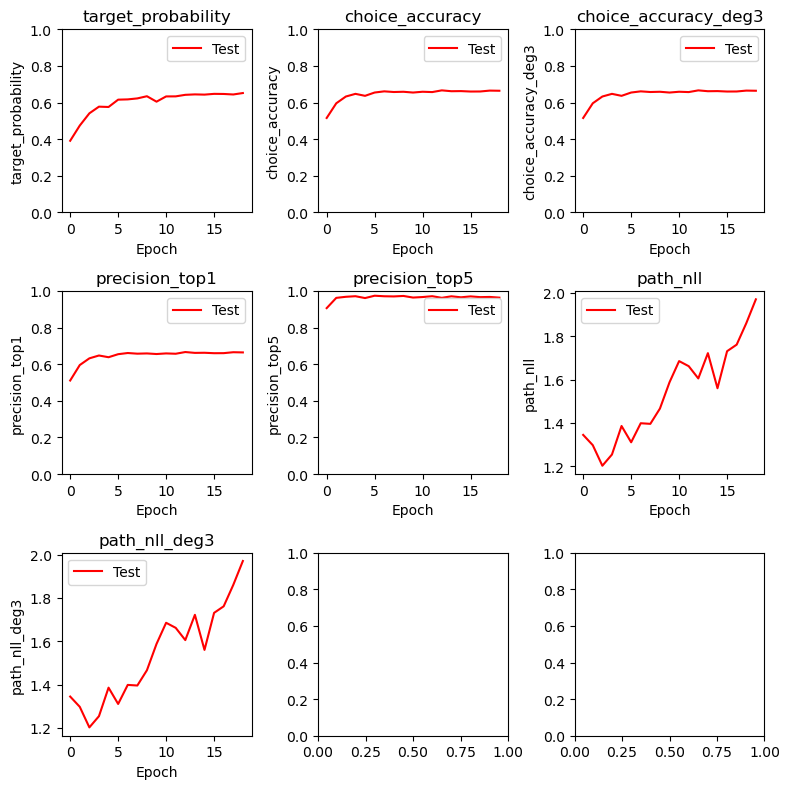

In [3]:
# plot training metrics
model.plot_train_test_metrics(test_only=True)

In [4]:
#start_node = 185
#end_node = 474
#node_dist, rw_weights = model.predict(start_node, end_node, 2)

In [5]:
#### PREDICTION PARAMETERS ######
prediction_task = 'next_nodes'  # 'next_nodes' or 'path'
n_walks = 1000
n_start_nodes = 1
n_steps_vals = [10]  # only needed for next nodes prediction
n_predictions = 1
max_path_length = 150

In [6]:
for n_steps in n_steps_vals:
    # Load test data from file
    path_prefix = '../../data/paths/'
    test_dates = ['202209']
    all_test_paths = dataloader_paths.load_path_test_data(path_prefix, network_name, test_dates, 
                                                          0, -1, 1, filter=filter, data_version=data_version)
    # select test data
    selection_start = 0
    selection_end = -1
    selection_step = 20
    
    # prepare test data
    if prediction_task == 'next_nodes':
        # split test paths in subpaths
        sub_paths = dataloader_paths.split_path_data(all_test_paths, n_steps+n_start_nodes)
        test_paths = dataloader_paths.sample_path_data(sub_paths, selection_start, selection_end, selection_step)
    else:
        test_paths = dataloader_paths.sample_path_data(all_test_paths, selection_start, selection_end, selection_step)
    n_test_paths=len(test_paths)
    
    
    #### MAKE PREDICTIONS ####
    import time
    start_time = time.time()
    predictions = model.predict(prediction_task, test_paths, n_start_nodes, n_steps, 
                                n_predictions, n_walks, max_path_length)
    end_time = time.time()  # end timer
    print(f'Time elapsed: {(end_time-start_time)/60:.2f} minutes')
    pps = n_test_paths/(end_time-start_time)
    print('Predictions per second: ', pps)
    
    
    # save results as csv
    predictions.to_csv(directory+path_format+'/predictions_'+prediction_task+str(n_steps)+'.csv')
    
    
    # save metadata to file
    if load_model == False:
        meta_dict['lr'] = model.config.lr
        meta_dict['loss'] = model.config.loss
        meta_dict['n_epochs'] = model.config.number_epoch
        meta_dict['target_prediction'] = model.config.target_prediction
    meta_dict['n_walks'] = n_walks
    meta_dict['n_start_nodes'] = n_start_nodes
    meta_dict['n_steps'] = n_steps
    meta_dict['prediction_task'] = prediction_task
    meta_dict['predictions_per_second'] = pps
    meta_dict['model_type'] = 'Gretel'
    meta_dict.update({'test_dates':str(test_dates),
                      'selection_start':selection_start,
                      'selection_end':selection_end,
                      'selection_step':selection_step,
                      'n_test_paths':len(test_paths)})
    with open(directory+path_format+'/metadata_'+prediction_task+str(n_steps)+'.json', 'w') as json_file:
        json.dump(meta_dict, json_file)

Making predictions for 1047 samples
Progress: 10%...20%...30%...40%...50%...60%...70%...80%...90%...Done!
Time elapsed: 10.23 minutes
Predictions per second:  1.705809582451462


In [7]:
'''
import pickle
# save model as pickle object
fileObj = open('../../models/gretel_prediction_models/trained_models/'+meta_dict['network_name']+filter'.obj', 'wb')
pickle.dump(model, fileObj)
fileObj.close()
'''

"\nimport pickle\n# save model as pickle object\nfileObj = open('../../models/gretel_prediction_models/trained_models/'+meta_dict['network_name']+filter'.obj', 'wb')\npickle.dump(model, fileObj)\nfileObj.close()\n"

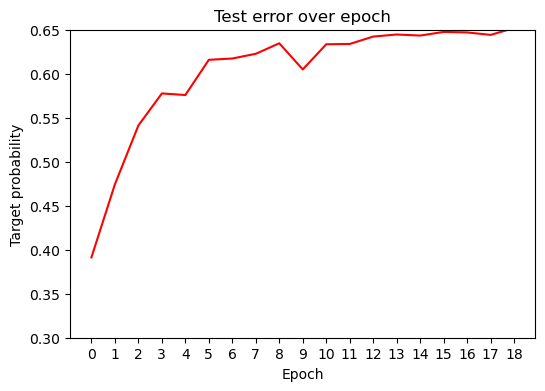

In [8]:
import matplotlib.pyplot as plt
key = 'target_probability'
test_metrics = np.array(model.test_metrics[key])
train_metrics = np.array(model.train_metrics[key])
x = np.arange(len(test_metrics))

fig, ax = plt.subplots(figsize=[6, 4])

plt.plot(x, test_metrics, label='Test', color='r')
#plt.plot(x, train_metrics, label='Train', color='b')

ax.set_ylim(0.3, 0.65)
ax.set_xticks(x)

ax.set_xlabel('Epoch')
ax.set_ylabel('Target probability')
#ax.legend(loc='upper left')

plt.title('Test error over epoch')
#plt.savefig('Test_error_over_epoch_test_only.pdf')
plt.show()